In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

In [3]:
df = pd.read_csv("house_prices_USA.csv")
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [4]:
df.shape

(4600, 18)

In [5]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [6]:
df["city"].unique()

array(['Shoreline', 'Seattle', 'Kent', 'Bellevue', 'Redmond',
       'Maple Valley', 'North Bend', 'Lake Forest Park', 'Sammamish',
       'Auburn', 'Des Moines', 'Bothell', 'Federal Way', 'Kirkland',
       'Issaquah', 'Woodinville', 'Normandy Park', 'Fall City', 'Renton',
       'Carnation', 'Snoqualmie', 'Duvall', 'Burien', 'Covington',
       'Inglewood-Finn Hill', 'Kenmore', 'Newcastle', 'Mercer Island',
       'Black Diamond', 'Ravensdale', 'Clyde Hill', 'Algona', 'Skykomish',
       'Tukwila', 'Vashon', 'Yarrow Point', 'SeaTac', 'Medina',
       'Enumclaw', 'Snoqualmie Pass', 'Pacific', 'Beaux Arts Village',
       'Preston', 'Milton'], dtype=object)

In [15]:
df2 = df.drop(['date','bedrooms','bathrooms','waterfront','view','condition','sqft_basement','yr_built','yr_renovated','street','statezip','country'],axis='columns')
df2.shape

(4600, 6)

In [16]:
df2.head()

,price,sqft_living,sqft_lot,floors,sqft_above,city
0,313000.0,1340,7912,1.5,1340,Shoreline
1,2384000.0,3650,9050,2.0,3370,Seattle
2,342000.0,1930,11947,1.0,1930,Kent
3,420000.0,2000,8030,1.0,1000,Bellevue
4,550000.0,1940,10500,1.0,1140,Redmond


In [19]:
#Examine locations which is a categorical variable. We need to apply dimensionality reduction technique here to reduce number of locations
df2.city = df2.city.apply(lambda x: x.strip())
city_stats = df2['city'].value_counts(ascending=False)
city_stats

Seattle                1573
Renton                  293
Bellevue                286
Redmond                 235
Issaquah                187
Kirkland                187
Kent                    185
Auburn                  176
Sammamish               175
Federal Way             148
Shoreline               123
Woodinville             115
Maple Valley             96
Mercer Island            86
Burien                   74
Snoqualmie               71
Kenmore                  66
Des Moines               58
North Bend               50
Covington                43
Duvall                   42
Lake Forest Park         36
Bothell                  33
Newcastle                33
SeaTac                   29
Tukwila                  29
Vashon                   29
Enumclaw                 28
Carnation                22
Normandy Park            18
Clyde Hill               11
Medina                   11
Fall City                11
Black Diamond             9
Ravensdale                7
Pacific             

In [20]:
city_stats.values.sum()

4600

In [21]:
len(city_stats[city_stats>10])

33

In [22]:
len(city_stats)

44

In [23]:
len(city_stats[city_stats<=10])

11

In [24]:
city_stats_less_than_10 = city_stats[city_stats<=10]
city_stats_less_than_10

Black Diamond          9
Ravensdale             7
Pacific                6
Algona                 5
Yarrow Point           4
Skykomish              3
Preston                2
Milton                 2
Inglewood-Finn Hill    1
Snoqualmie Pass        1
Beaux Arts Village     1
Name: city, dtype: int64

In [25]:
len(df2.city.unique())

44

In [26]:
df2.city = df2.city.apply(lambda x: 'other' if x in city_stats_less_than_10 else x)
len(df2.city.unique())

34

In [27]:
df2.head(10)

,price,sqft_living,sqft_lot,floors,sqft_above,city
0,313000.0,1340,7912,1.5,1340,Shoreline
1,2384000.0,3650,9050,2.0,3370,Seattle
2,342000.0,1930,11947,1.0,1930,Kent
3,420000.0,2000,8030,1.0,1000,Bellevue
4,550000.0,1940,10500,1.0,1140,Redmond
5,490000.0,880,6380,1.0,880,Seattle
6,335000.0,1350,2560,1.0,1350,Redmond
7,482000.0,2710,35868,2.0,2710,Maple Valley
8,452500.0,2430,88426,1.0,1570,North Bend
9,640000.0,1520,6200,1.5,1520,Seattle


In [29]:
pip install pandas scipy

Note: you may need to restart the kernel to use updated packages.


In [35]:
from scipy import stats

columns_to_check = ['price', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above']
# Calculate Z-scores for specified columns
z_scores = stats.zscore(df2[columns_to_check])

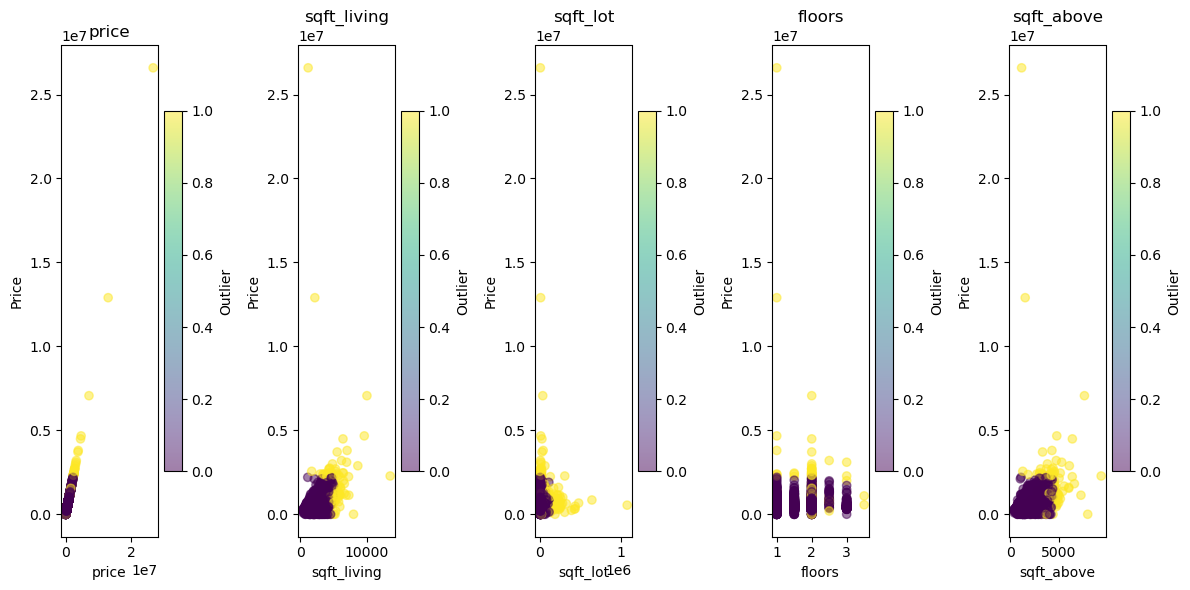

In [36]:
# Define a threshold for outlier detection (e.g., 3 standard deviations)
threshold = 3

# Find and mark outliers
outliers = (abs(z_scores) > threshold).any(axis=1)
df2['outlier'] = outliers

# Plot the data points with outliers
plt.figure(figsize=(12, 6))

for column in columns_to_check:
    plt.subplot(1, len(columns_to_check), columns_to_check.index(column) + 1)
    plt.scatter(df2[column], df2['price'], c=df2['outlier'], cmap='viridis', alpha=0.5)
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('Price')
    plt.colorbar(label='Outlier')

plt.tight_layout()
plt.show()

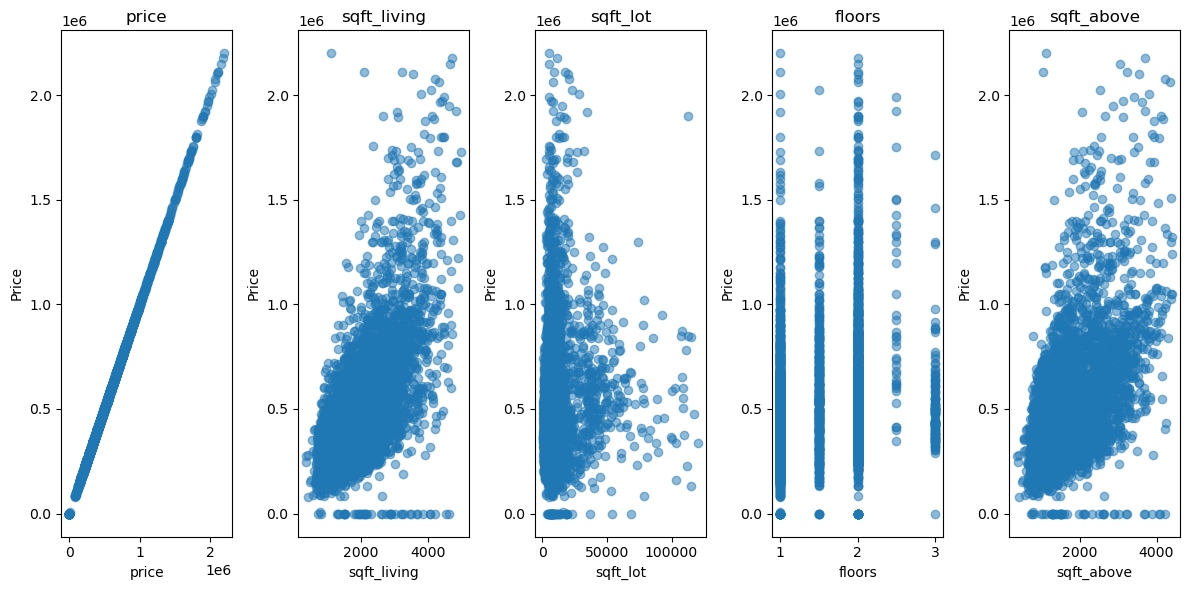

In [37]:
# Remove outliers
df_no_outliers = df2[~outliers]

# Plot the data points without outliers
plt.figure(figsize=(12, 6))

for column in columns_to_check:
    plt.subplot(1, len(columns_to_check), columns_to_check.index(column) + 1)
    plt.scatter(df_no_outliers[column], df_no_outliers['price'], alpha=0.5)
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('Price')

plt.tight_layout()
plt.show()

In [39]:
dummies = pd.get_dummies(df2.city)
dummies.head(3)

,Auburn,Bellevue,Bothell,Burien,Carnation,Clyde Hill,Covington,Des Moines,Duvall,Enumclaw,...,Renton,Sammamish,SeaTac,Seattle,Shoreline,Snoqualmie,Tukwila,Vashon,Woodinville,other
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
df3 = pd.concat([df2,dummies.drop('other',axis='columns')],axis='columns')
df3.head()

,price,sqft_living,sqft_lot,floors,sqft_above,city,outlier,Auburn,Bellevue,Bothell,...,Redmond,Renton,Sammamish,SeaTac,Seattle,Shoreline,Snoqualmie,Tukwila,Vashon,Woodinville
0,313000.0,1340,7912,1.5,1340,Shoreline,False,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,2384000.0,3650,9050,2.0,3370,Seattle,True,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,342000.0,1930,11947,1.0,1930,Kent,False,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,420000.0,2000,8030,1.0,1000,Bellevue,False,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,550000.0,1940,10500,1.0,1140,Redmond,False,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [42]:
df4 = df3.drop('city',axis='columns')
df4.head(5)

,price,sqft_living,sqft_lot,floors,sqft_above,outlier,Auburn,Bellevue,Bothell,Burien,...,Redmond,Renton,Sammamish,SeaTac,Seattle,Shoreline,Snoqualmie,Tukwila,Vashon,Woodinville
0,313000.0,1340,7912,1.5,1340,False,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,2384000.0,3650,9050,2.0,3370,True,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,342000.0,1930,11947,1.0,1930,False,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,420000.0,2000,8030,1.0,1000,False,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,550000.0,1940,10500,1.0,1140,False,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [43]:
df4.shape

(4600, 39)

In [44]:
X = df4.drop(['price'],axis='columns')
X.head(3)

,sqft_living,sqft_lot,floors,sqft_above,outlier,Auburn,Bellevue,Bothell,Burien,Carnation,...,Redmond,Renton,Sammamish,SeaTac,Seattle,Shoreline,Snoqualmie,Tukwila,Vashon,Woodinville
0,1340,7912,1.5,1340,False,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,3650,9050,2.0,3370,True,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1930,11947,1.0,1930,False,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
X.shape

(4600, 38)

In [46]:
y = df4.price
y.head(3)

0     313000.0
1    2384000.0
2     342000.0
Name: price, dtype: float64

In [47]:
len(y)

4600

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [59]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.47538937233873935

In [50]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.66658974, 0.64013587, 0.09821052, 0.49184098, 0.41004124])

In [61]:
from sklearn.model_selection import ShuffleSplit, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
import pandas as pd

def find_best_model_using_gridsearchcv(X, y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(max_iter=10000),  # Increase max_iter
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['squared_error', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

find_best_model_using_gridsearchcv(X, y)


,model,best_score,best_params
0,linear_regression,0.461993,{'fit_intercept': False}
1,lasso,0.461380,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.136248,"{'criterion': 'squared_error', 'splitter': 'ra..."


In [62]:
def predict_price(city,sqft_living,sqft_lot,floors,sqft_above):    
    loc_index = np.where(X.columns==city)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft_living
    x[1] = sqft_lot
    x[2] = floors
    x[3] = sqft_above
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [63]:
predict_price('Bothell',1300, 7349, 2,3000)


C:\Users\ayesh\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


318360.4130227261

In [64]:
predict_price('Shoreline',1600, 4349, 1,1500)


C:\Users\ayesh\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


398986.2704070288

In [65]:
import pickle
with open('house_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [66]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))